In [34]:
##install tabulate
!pip install tabulate

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [36]:
##install and import pandasdatareader
!pip install pandas_datareader
from pandas_datareader import data as pdr
##install and import yfinance
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

In [37]:
#load lickers variable for Coca Cola
ticker = ['KO'] ##KO 

In [38]:
##Set start and end date
start_date = '2019-04-04'
end_date = '2023-04-04'

In [39]:
##Create dataframe
ticker = 'KO'
df_yf = pdr.get_data_yahoo(ticker,start=start_date,end=end_date)['Close'].to_frame()
df_yf

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-04-04,46.480000
2019-04-05,46.470001
2019-04-08,46.549999
2019-04-09,46.669998
2019-04-10,46.639999
...,...
2023-03-28,61.419998
2023-03-29,61.860001
2023-03-30,61.849998


In [40]:
df_yf.head()

,Close
Date,
2019-04-04,46.480000
2019-04-05,46.470001
2019-04-08,46.549999
2019-04-09,46.669998
2019-04-10,46.639999


In [41]:
df_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2019-04-04 to 2023-04-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1007 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


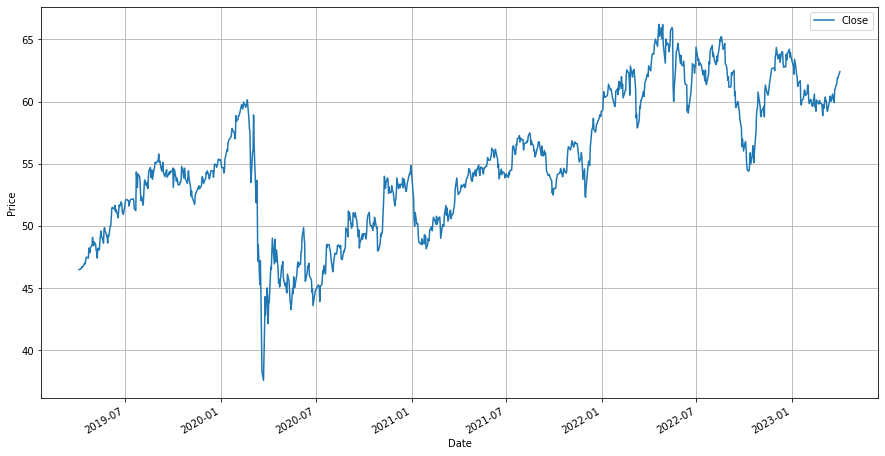

In [42]:
##Plot graph for price changes
df_yf.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

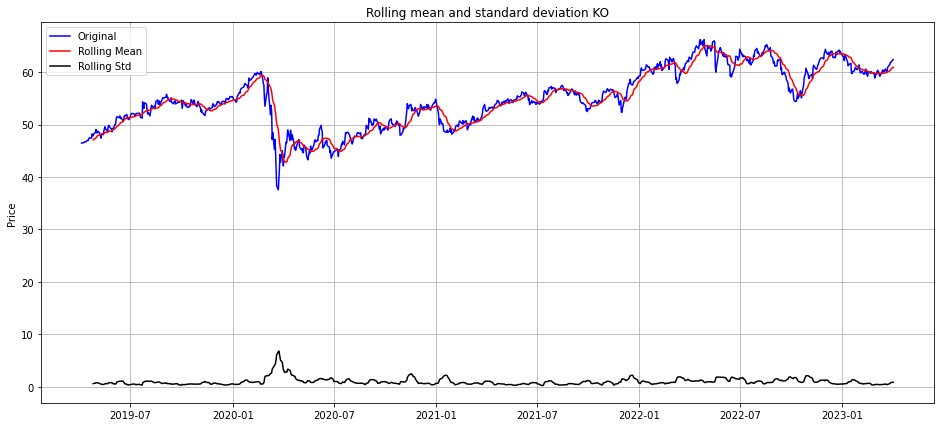

In [43]:
##Plot graph for rolling mean and standard deviation
rolling_mean = df_yf['Close'].rolling(15).mean()
rolling_std = df_yf['Close'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df_yf['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'KO')
plt.grid()
plt.ylabel("Price")
plt.show()

In [44]:
# create 20 days simple moving average column
df_yf['SMA20'] = df_yf['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df_yf['SMA50'] = df_yf['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df_yf.head()

,Close,SMA20,SMA50
Date,,,
2019-04-04,46.480000,46.4800,46.4800
2019-04-05,46.470001,46.4750,46.4750
2019-04-08,46.549999,46.5000,46.5000
2019-04-09,46.669998,46.5425,46.5425
2019-04-10,46.639999,46.5620,46.5620


In [45]:
df_yf['Signal'] = 0.0
df_yf['Signal'] = np.where(df_yf['SMA20'] > df_yf['SMA50'], 1.0, 0.0)

In [46]:
df_yf['Position'] = df_yf['Signal'].diff()
# display first few rows
df_yf.head()

,Close,SMA20,SMA50,Signal,Position
Date,,,,,
2019-04-04,46.480000,46.4800,46.4800,0.0,NaN
2019-04-05,46.470001,46.4750,46.4750,0.0,0.0
2019-04-08,46.549999,46.5000,46.5000,0.0,0.0
2019-04-09,46.669998,46.5425,46.5425,0.0,0.0
2019-04-10,46.639999,46.5620,46.5620,0.0,0.0


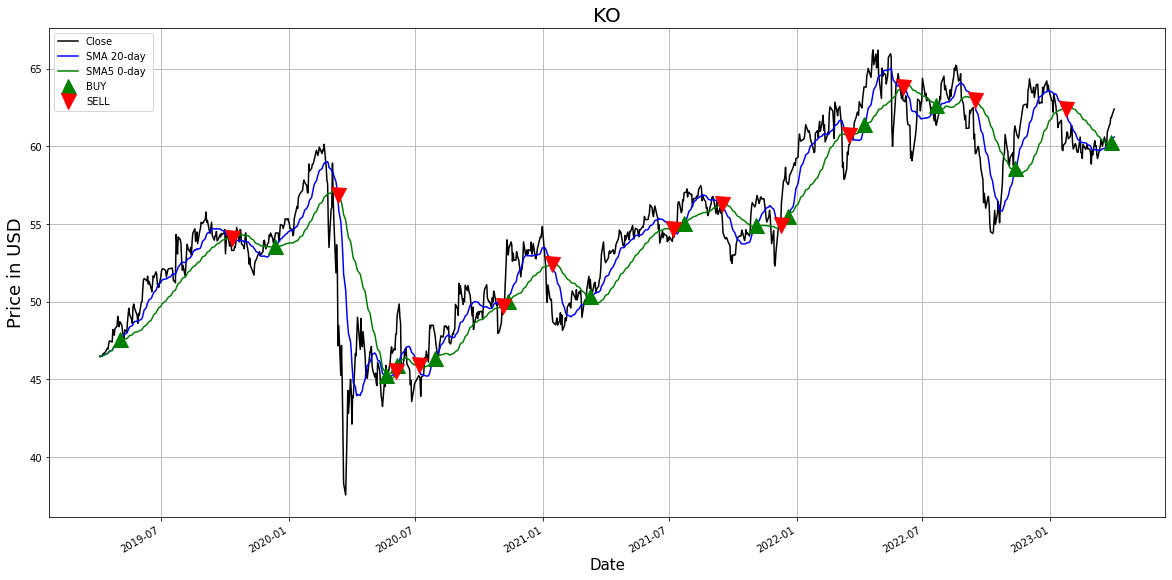

In [47]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_yf['Close'].plot(color = 'k', label= 'Close') 
df_yf['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df_yf['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df_yf[df_yf['Position'] == 1].index, 
         df_yf['SMA20'][df_yf['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df_yf[df_yf['Position'] == -1].index, 
         df_yf['SMA50'][df_yf['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('KO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [48]:
df_position = df_yf[(df_yf['Position'] == 1) | (df_yf['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+---------+---------+----------+------------+
| Date                |   Close |   SMA20 |   SMA50 |   Signal | Position   |
|---------------------+---------+---------+---------+----------+------------|
| 2019-05-03 00:00:00 |   48.72 | 47.568  | 47.5162 |        1 | Buy        |
| 2019-10-11 00:00:00 |   53.3  | 54.048  | 54.1062 |        0 | Sell       |
| 2019-12-12 00:00:00 |   54.14 | 53.5735 | 53.5222 |        1 | Buy        |
| 2020-03-12 00:00:00 |   47.16 | 56.4495 | 56.86   |        0 | Sell       |
| 2020-05-20 00:00:00 |   45.89 | 45.2645 | 45.2326 |        1 | Buy        |
| 2020-06-03 00:00:00 |   47.9  | 45.535  | 45.5478 |        0 | Sell       |
| 2020-06-05 00:00:00 |   49.09 | 45.918  | 45.8668 |        1 | Buy        |
| 2020-07-07 00:00:00 |   45.21 | 45.7565 | 45.9072 |        0 | Sell       |
| 2020-07-29 00:00:00 |   48.02 | 46.4005 | 46.3774 |        1 | Buy        |
| 2020-11-05 00:00:00 |   49.44 | 49.682  | 49.73   |        0 |